In [18]:
# Impor Library yang Dibutuhkan

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [20]:
data = pd.read_csv("../input/network-traffic-android-malware/android_traffic.csv", sep=";", low_memory=False, encoding='utf-8')

In [21]:
# Cetak 5 baris teratas
data.head()

,name,tcp_packets,dist_port_tcp,external_ips,vulume_bytes,udp_packets,tcp_urg_packet,source_app_packets,remote_app_packets,source_app_bytes,remote_app_bytes,duracion,avg_local_pkt_rate,avg_remote_pkt_rate,source_app_packets.1,dns_query_times,type
0,AntiVirus,36,6,3,3911,0,0,39,33,5100,4140,NaN,NaN,NaN,39,3,benign
1,AntiVirus,117,0,9,23514,0,0,128,107,26248,24358,NaN,NaN,NaN,128,11,benign
2,AntiVirus,196,0,6,24151,0,0,205,214,163887,24867,NaN,NaN,NaN,205,9,benign
3,AntiVirus,6,0,1,889,0,0,7,6,819,975,NaN,NaN,NaN,7,1,benign
4,AntiVirus,6,0,1,882,0,0,7,6,819,968,NaN,NaN,NaN,7,1,benign


In [22]:
missing = data.isnull().sum()
missing

name                       0
tcp_packets                0
dist_port_tcp              0
external_ips               0
vulume_bytes               0
udp_packets                0
tcp_urg_packet             0
source_app_packets         0
remote_app_packets         0
source_app_bytes           0
remote_app_bytes           0
duracion                7845
avg_local_pkt_rate      7845
avg_remote_pkt_rate     7845
source_app_packets.1       0
dns_query_times            0
type                       0
dtype: int64

In [23]:
# memilih kolom yang akan digunakan
data = data[['tcp_packets', 'dist_port_tcp', 'external_ips', 'remote_app_packets', 'source_app_packets', 'dns_query_times', 'type']]
data.head()

# memisahkan atribut dan label
predictions = ['tcp_packets', 'dist_port_tcp', 'external_ips', 'remote_app_packets', 'source_app_packets', 'dns_query_times']
X = data[predictions]
y = data['type']

# melakukan encode pada data string label
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# melakukan split data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [24]:
# Inisialisasi model Gradient Boosting Classifier with adjusted parameters
model = GradientBoostingClassifier(learning_rate=0.01, max_depth=10, n_estimators=100)

# fit the model with data
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=10)

In [25]:
# melakukan prediksi
y_pred = model.predict(X_test)

In [26]:
# menampilkan hasil akurasi
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=model.predict(X_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

# menampilkan hasil klasifikasi
print(classification_report(y_test, y_pred))

Accuracy Score on train data:  0.8463989802421925
Accuracy Score on test data:  0.8177182919056724
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       942
           1       0.85      0.66      0.74       627

    accuracy                           0.82      1569
   macro avg       0.83      0.79      0.80      1569
weighted avg       0.82      0.82      0.81      1569



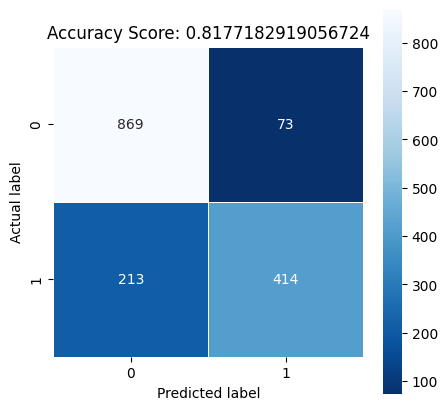

In [27]:
# visualisasi hasil klasifikasi
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred)))
plt.show()
